# **House Price Prediction and Impacting Factors in England**

*This paper* 
>每个section添加下面的链接


| [1. Introduction](#1.-Introduction) | [2. Literature Review](#2.-Literature-Review) | [3. Research Question](#3.-Research-Question) | [4. Data](#4.-Data) | [5. Methodology](#5.-Methodology) | [6. Results and Discussion](#6.-Results-and-Discussion) | [7. Conclusion](#7.-Conclusion) | [Bibliography](#Bibliography) |

---

## 1. Introduction


house price prediction is regression problem
supervised learning

In [1]:
# Import time for measuring the execution time of the program
import time

start_time = time.time()

In [2]:
# Import the packages for data manipulation and processing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows", 300)  # specifies number of rows to show
pd.options.display.float_format = (
    "{:40,.4f}".format
)  # specifies default number format to 4 decimal places
plt.style.use("ggplot")  # specifies that graphs should use ggplot styling
%matplotlib inline

## 2. Literature Review

## 3. Research Question

## 4. Data

The data is obtained from HM Land Registry Open Data, which contains house price paid data in England and Wales in 2021

### 4.1 Data Cleaning

add column headers, 
import dataset from
from the data info, it can be seen that the transaction unique identifier is object, which can be convert to integer transaction ID for further analysis

In [3]:
# Import the dataset
df = pd.read_csv("Data/Price_Paid_Data_2021.csv")
df

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD_Category_Type
0,{C6209F5F-3182-295E-E053-6C04A8C0DDCC},270000,2021/3/11 0:00,CM18 7JN,T,N,F,23,NaN,CORNER MEADOW,NaN,HARLOW,HARLOW,ESSEX,A
1,{C6209F5F-3184-295E-E053-6C04A8C0DDCC},246000,2021/6/4 0:00,SS8 8JW,D,N,F,22,NaN,LIMETREE ROAD,NaN,CANVEY ISLAND,CASTLE POINT,ESSEX,A
2,{C6209F5F-3185-295E-E053-6C04A8C0DDCC},250000,2021/4/9 0:00,CM2 8QL,T,N,F,25,NaN,THE STREET,GALLEYWOOD,CHELMSFORD,CHELMSFORD,ESSEX,A
3,{C6209F5F-3186-295E-E053-6C04A8C0DDCC},660000,2021/5/26 0:00,CO6 1QU,D,N,F,3,NaN,GARDENERS ROW,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A
4,{C6209F5F-3187-295E-E053-6C04A8C0DDCC},567500,2021/4/9 0:00,SS6 9NS,D,N,F,6,NaN,SAXON CLOSE,NaN,RAYLEIGH,ROCHFORD,ESSEX,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944722,{CD5A9DCB-FAD5-310A-E053-6C04A8C00A1F},325000,2021/5/28 0:00,ME10 4AG,T,N,F,19,NaN,HONESTY CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,A
944723,{CD5A9DCB-FAD8-310A-E053-6C04A8C00A1F},355000,2021/5/28 0:00,ME12 3TD,D,N,F,31,NaN,CHARLOCK DRIVE,MINSTER ON SEA,SHEERNESS,SWALE,KENT,A
944724,{CD5A9DCB-FAD9-310A-E053-6C04A8C00A1F},540000,2021/6/25 0:00,TN9 2NJ,D,N,F,93,NaN,JUDD ROAD,NaN,TONBRIDGE,TONBRIDGE AND MALLING,KENT,A
944725,{CD5A9DCB-FADA-310A-E053-6C04A8C00A1F},175000,2021/7/14 0:00,CT17 9PU,D,N,F,7,NaN,QUEENS AVENUE,NaN,DOVER,DOVER,KENT,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944727 entries, 0 to 944726
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Transaction_unique_identifier  944727 non-null  object
 1   Price                          944727 non-null  int64 
 2   Date_of_Transfer               944727 non-null  object
 3   Postcode                       941896 non-null  object
 4   Property_Type                  944727 non-null  object
 5   Building_Age                   944727 non-null  object
 6   Tenure                         944727 non-null  object
 7   PAON                           944727 non-null  object
 8   SAON                           103127 non-null  object
 9   Street                         926258 non-null  object
 10  Locality                       360019 non-null  object
 11  Town/City                      944727 non-null  object
 12  District                       944727 non-nu

There are some house postcodes missing from the summary table, which will be excluded. And since only England data will be investigated, Wales data will be excluded.

In [5]:
# Drop rows with NA postcode
df = df.dropna(subset = ['Postcode']) 

# Drop rows with Wales Postcode
df = df[df.Postcode.str.startswith(('CF', 'LD', 'LL', 'NP', 'SA', 'SY')) == False]

df

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD_Category_Type
0,{C6209F5F-3182-295E-E053-6C04A8C0DDCC},270000,2021/3/11 0:00,CM18 7JN,T,N,F,23,NaN,CORNER MEADOW,NaN,HARLOW,HARLOW,ESSEX,A
1,{C6209F5F-3184-295E-E053-6C04A8C0DDCC},246000,2021/6/4 0:00,SS8 8JW,D,N,F,22,NaN,LIMETREE ROAD,NaN,CANVEY ISLAND,CASTLE POINT,ESSEX,A
2,{C6209F5F-3185-295E-E053-6C04A8C0DDCC},250000,2021/4/9 0:00,CM2 8QL,T,N,F,25,NaN,THE STREET,GALLEYWOOD,CHELMSFORD,CHELMSFORD,ESSEX,A
3,{C6209F5F-3186-295E-E053-6C04A8C0DDCC},660000,2021/5/26 0:00,CO6 1QU,D,N,F,3,NaN,GARDENERS ROW,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A
4,{C6209F5F-3187-295E-E053-6C04A8C0DDCC},567500,2021/4/9 0:00,SS6 9NS,D,N,F,6,NaN,SAXON CLOSE,NaN,RAYLEIGH,ROCHFORD,ESSEX,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944722,{CD5A9DCB-FAD5-310A-E053-6C04A8C00A1F},325000,2021/5/28 0:00,ME10 4AG,T,N,F,19,NaN,HONESTY CLOSE,NaN,SITTINGBOURNE,SWALE,KENT,A
944723,{CD5A9DCB-FAD8-310A-E053-6C04A8C00A1F},355000,2021/5/28 0:00,ME12 3TD,D,N,F,31,NaN,CHARLOCK DRIVE,MINSTER ON SEA,SHEERNESS,SWALE,KENT,A
944724,{CD5A9DCB-FAD9-310A-E053-6C04A8C00A1F},540000,2021/6/25 0:00,TN9 2NJ,D,N,F,93,NaN,JUDD ROAD,NaN,TONBRIDGE,TONBRIDGE AND MALLING,KENT,A
944725,{CD5A9DCB-FADA-310A-E053-6C04A8C00A1F},175000,2021/7/14 0:00,CT17 9PU,D,N,F,7,NaN,QUEENS AVENUE,NaN,DOVER,DOVER,KENT,A


From all the available features, the most relevant factors are identified for building the prediction model, and the rest are excluded as they are missing, duplicate or redundant. The variables listed below are those that contribute to house price forecasting. It should be noticed that postcode is decided to represent property location rather than the other position information, which is because postcode is succinct and unique, and it will be convert to longitude and latittude in the later process.
- **Price**: stated sale price of the properties (*dependent variable*)
- **Date of Transfer**: date when the sale is finished, Year/Month/Day_Time (*independent variable*)
- **Postcode**: postcode of th properties (*independent variable*)
- **Property type**: D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other  (*independent variable*)
- **Building age**: the age of the property, Y = a newly built property, N = an established residential building (*independent variable*)
- **Tenure**: tenure of the properties, F = Freehold, L= Leasehold (*independent variable*)


In [6]:
df = df.drop([
        "Transaction_unique_identifier",
        "PAON",
        "SAON",
        "Street",
        "Locality",
        "Town/City",
        "District",
        "County",
        "PPD_Category_Type",],axis=1,)

df.head()

,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure
0,270000,2021/3/11 0:00,CM18 7JN,T,N,F
1,246000,2021/6/4 0:00,SS8 8JW,D,N,F
2,250000,2021/4/9 0:00,CM2 8QL,T,N,F
3,660000,2021/5/26 0:00,CO6 1QU,D,N,F
4,567500,2021/4/9 0:00,SS6 9NS,D,N,F


It could be seen that the data is still extremely large, using the entire dataset would be computationally challenging and significantly affect the program running and training time. To improve the time and training efficiency, only 50 thousand sets of data is selected. The data with na values is excluded, then the datasets will be randomly selected to avoid data bias and inequity.

In [7]:
df = df.dropna() 

In [8]:
np.random.seed(10)

df_subset = df.sample(n=50000)

df_subset

,Price,Date_of_Transfer,Postcode,Property_Type,Building_Age,Tenure
766120,72500,2021/4/28 0:00,TS12 2AL,T,N,F
513417,110000,2021/3/23 0:00,ST4 7EW,S,N,F
643478,261000,2021/3/4 0:00,PO1 3FT,F,N,L
834396,135000,2021/5/5 0:00,CO4 9YD,F,N,F
559621,370000,2021/8/6 0:00,CV5 9DW,S,N,F
...,...,...,...,...,...,...
239009,215000,2021/6/25 0:00,WA3 2XE,S,N,F
824155,90000,2021/4/26 0:00,S41 0BU,S,N,F
886556,328000,2021/9/23 0:00,M27 0FA,S,N,F
814395,360000,2021/6/24 0:00,DH8 9EE,O,N,F


### 4.2 Data Investigating and Pre-processing

In order to apply the data for establishing prediction model, pre-processing is required.

Firstly, 

The date of transaction is now represented as the number of months since January 1995 (the earliest month of transaction in our dataset), to simplify the representation of time by months only, instead of month and year.




In [9]:
# Transfer the date data to month data since 2021 Janurary
df_subset['Month'] = pd.DatetimeIndex(df_subset['Date_of_Transfer']).month 

# Drop the date of transfer column
df_subset = df_subset.drop(['Date_of_Transfer'], axis=1)

df_subset.head()

,Price,Postcode,Property_Type,Building_Age,Tenure,Month
766120,72500,TS12 2AL,T,N,F,4
513417,110000,ST4 7EW,S,N,F,3
643478,261000,PO1 3FT,F,N,L,3
834396,135000,CO4 9YD,F,N,F,5
559621,370000,CV5 9DW,S,N,F,8


Secondly, the postcode is replaced by latitudes and longitudes to indicate the

as the coordinate data is too large to contain, the data source and the manipulate processes are presented below.

 To capture geographical variation in housing prices more accurately, we decide to represent the address of the property in terms of latitudes and longitudes rather than postcodes. This is preferable to postcodes as neigh- bouring regions do not necessarily share similar postcodes (e.g. SW7 and W8). This process is automated through a Python script which looks up the postcode in a pre-compiled CSV file of London postcodes1, and returns the corresponding latitude and longitude.

In [10]:
# read UK coordinates file into pandas DataFrame. The data link is: http://download.geonames.org/export/zip/

# GBcoords1 = pd.read_csv("Data/GBcoords1.csv")
# GBcoords2 = pd.read_csv("Data/GBcoords2.csv")


In [11]:
# # Concat the two coordinate file
# frames = [GBcoords1, GBcoords2]

# GBcoords = pd.concat(frames)

In [12]:
# # Merge the latitude and longitude data into the datasets
# df_subset  = df_subset.merge(GBcoords, on='Postcode', how='left')
# df_subset

In [13]:
# # Drop the rows without latitude and longitude values (latitude and longitude are consistent)
# df_subset = df_subset.dropna(subset = ['Latitude']) 

# # Drop the Postcode column
# df_subset = df_subset.drop(['Postcode'], axis=1)

# print(df_subset.head())

# df_subset.to_csv(r'Data/df_subset.csv', index = False)

The saved data above is the data link below, which contains latitude and longitude values without postcode column.

In [14]:
df_subset = pd.read_csv('https://raw.githubusercontent.com/joeylizh/DSSS_Assessment/main/df_subset.csv')

df_subset.head()

,Price,Property_Type,Building_Age,Tenure,Month,Latitude,Longitude
0,72500,T,N,F,4,54.5575,-0.9597
1,110000,S,N,F,3,53.0079,-2.1951
2,261000,F,N,L,3,50.8005,-1.1029
3,135000,F,N,F,5,51.9100,0.9163
4,370000,S,N,F,8,52.4332,-1.5664


In [15]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          49977 non-null  int64  
 1   Property_Type  49977 non-null  object 
 2   Building_Age   49977 non-null  object 
 3   Tenure         49977 non-null  object 
 4   Month          49977 non-null  int64  
 5   Latitude       49977 non-null  float64
 6   Longitude      49977 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.7+ MB


Finally, 

Binary categorical variables (build & tenure) are represented using one binary digit (i.e. (Build) 0 = Old, 1 = New / (Tenure) 0 = Leasehold, 1 = Freehold), while property type is represented using three binary digits through the use of dummy coding [43] (i.e. 000 = Detached, 100 = Semi- detached, 010 = Terrace, 001 = Flat).

I want Old =0 and New =1 So we drop column "N" here

In [16]:
# Data of Building age is converted into Binary Data
df_one = pd.get_dummies(df_subset['Building_Age'])
 
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_subset, df_one), axis=1)
 
# Column "Building_Age" is dropped
df_two = df_two.drop(['Building_Age'], axis=1)
 
# I want Old =0 and New =1 So we drop column "N" here
df_two = df_two.drop(["N"], axis=1)
 
# Rename the Column
df_numeric1 = df_two.rename(columns={"Y": "Building_Age"})
 
# Print the Result
df_numeric1

,Price,Property_Type,Tenure,Month,Latitude,Longitude,Building_Age
0,72500,T,F,4,54.5575,-0.9597,0
1,110000,S,F,3,53.0079,-2.1951,0
2,261000,F,L,3,50.8005,-1.1029,0
3,135000,F,F,5,51.9100,0.9163,0
4,370000,S,F,8,52.4332,-1.5664,0
...,...,...,...,...,...,...,...
49972,215000,S,F,6,53.4695,-2.5806,0
49973,90000,S,F,4,53.2294,-1.3998,0
49974,328000,S,F,9,53.5005,-2.3537,0
49975,360000,O,F,6,54.8338,-1.8117,0


Data of Tenure is converted into Binary Data by the same way
Leasehold =0 and Freehold =1 So drop column "L" here

In [17]:
# Data of Tenure is converted into Binary Data
df_three = pd.get_dummies(df_numeric1['Tenure'])
 
# Binary Data is Concatenated into Dataframe
df_four = pd.concat((df_numeric1, df_three), axis=1)
 
# Column "Tenure" is dropped
df_four = df_four.drop(['Tenure'], axis=1)
 
# Leasehold =0 and Freehold =1 So drop column "L" here
df_four = df_four.drop(["L"], axis=1)
 
# Rename the Column
df_numeric2 = df_four.rename(columns={"F": "Tenure"})
 
# Print the Result
df_numeric2

,Price,Property_Type,Month,Latitude,Longitude,Building_Age,Tenure
0,72500,T,4,54.5575,-0.9597,0,1
1,110000,S,3,53.0079,-2.1951,0,1
2,261000,F,3,50.8005,-1.1029,0,0
3,135000,F,5,51.9100,0.9163,0,1
4,370000,S,8,52.4332,-1.5664,0,1
...,...,...,...,...,...,...,...
49972,215000,S,6,53.4695,-2.5806,0,1
49973,90000,S,4,53.2294,-1.3998,0,1
49974,328000,S,9,53.5005,-2.3537,0,1
49975,360000,O,6,54.8338,-1.8117,0,1


The final step is to convert the property type, which contains five categories. Still deploy the same method but list the conversion of all the 5 categorical columns in dummy columns.  

In [18]:
df_cleaned = pd.get_dummies(df_numeric2, columns = ['Property_Type'])

df_cleaned

,Price,Month,Latitude,Longitude,Building_Age,Tenure,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T
0,72500,4,54.5575,-0.9597,0,1,0,0,0,0,1
1,110000,3,53.0079,-2.1951,0,1,0,0,0,1,0
2,261000,3,50.8005,-1.1029,0,0,0,1,0,0,0
3,135000,5,51.9100,0.9163,0,1,0,1,0,0,0
4,370000,8,52.4332,-1.5664,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49972,215000,6,53.4695,-2.5806,0,1,0,0,0,1,0
49973,90000,4,53.2294,-1.3998,0,1,0,0,0,1,0
49974,328000,9,53.5005,-2.3537,0,1,0,0,0,1,0
49975,360000,6,54.8338,-1.8117,0,1,0,0,1,0,0


In [19]:
# check out the new dataFrame
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            49977 non-null  int64  
 1   Month            49977 non-null  int64  
 2   Latitude         49977 non-null  float64
 3   Longitude        49977 non-null  float64
 4   Building_Age     49977 non-null  uint8  
 5   Tenure           49977 non-null  uint8  
 6   Property_Type_D  49977 non-null  uint8  
 7   Property_Type_F  49977 non-null  uint8  
 8   Property_Type_O  49977 non-null  uint8  
 9   Property_Type_S  49977 non-null  uint8  
 10  Property_Type_T  49977 non-null  uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 1.9 MB


In [20]:
df_cleaned.describe()

,Price,Month,Latitude,Longitude,Building_Age,Tenure,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T
count,"49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000","49,977.0000"
mean,"386,537.6663",5.5615,52.3336,-1.1943,0.0316,0.7857,0.2355,0.1603,0.0413,0.2721,0.2908
std,"1,249,951.1465",3.0204,1.1590,1.2550,0.1749,0.4103,0.4243,0.3669,0.1989,0.4450,0.4542
min,100.0000,1.0000,49.9144,-6.3115,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"175,000.0000",3.0000,51.4331,-2.0964,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,"273,000.0000",6.0000,52.0967,-1.2407,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,"420,000.0000",8.0000,53.3791,-0.1946,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000
max,"130,500,000.0000",12.0000,55.7860,1.7551,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [21]:
df_cleaned.isnull().sum()

Price              0
Month              0
Latitude           0
Longitude          0
Building_Age       0
Tenure             0
Property_Type_D    0
Property_Type_F    0
Property_Type_O    0
Property_Type_S    0
Property_Type_T    0
dtype: int64

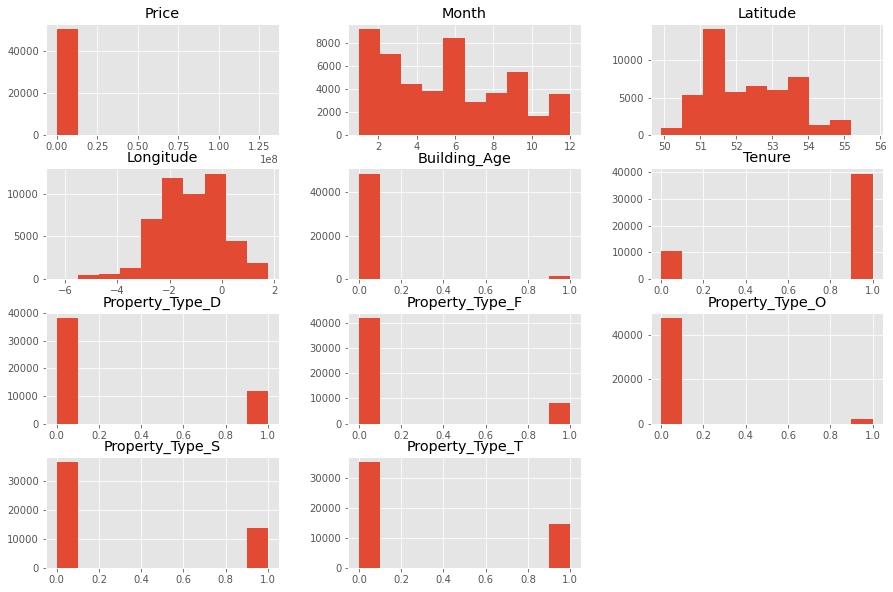

In [22]:
df_histogram = df_cleaned.hist(figsize = (15,10))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


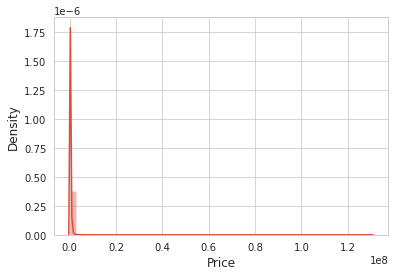

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


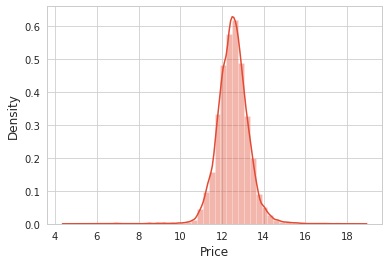

In [23]:
import seaborn as sns 

x = df_cleaned.Price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

Price_log = np.log(df_cleaned.Price)
x = Price_log
sns.distplot(x)
plt.show()

# Train['SalePrice_log'] = np.log(Train.SalePrice)
# x = Train.SalePrice_log
# sns.distplot(x)
# plt.show()

## 5. Methodology

### 5.1 Set Train and Test Subsets

By default, train_test_split will split the data according to a 75:25 split. Other proportions can be specified, check out the documentation for details.
Remember that the split should be random in order to avoid selection bias. Here, we set random_state=100 to guarantee reproducibility.



In [24]:
X = df_cleaned.drop(['Price'], axis=1)
y = df_cleaned['Price']

print(X.shape)
print(y.shape)

(49977, 10)
(49977,)


Split your data into train, dev and test sets

In [25]:
# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1024)

In [26]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34983, 10)
(7497, 10)
(7497, 10)


### 5.2 Multicollinearity Checking

In regression, `multicollinearity` emerges when two or more variables, which are highly correlated are included in a model. It can emerge even when each pair of variables involved are not colinear. For example, think of the four dummy variables relating to seasons in the `bike_rental_numeric` dataset.  

You can check the colinearity between attributes using a correlation matrix as below. Think of these two questions:

- **What can you get from this plot? For example, which pair of variables are highly correlated, and can you explain it?**
- **Can you use the correlation matrix to deal with multicolinearity, for example, by removing one of the two variables if their correlation is above 0.75?** (*Hint*: a short answer is NO)

Text(0.5, 1.0, 'Correlation Matrix')

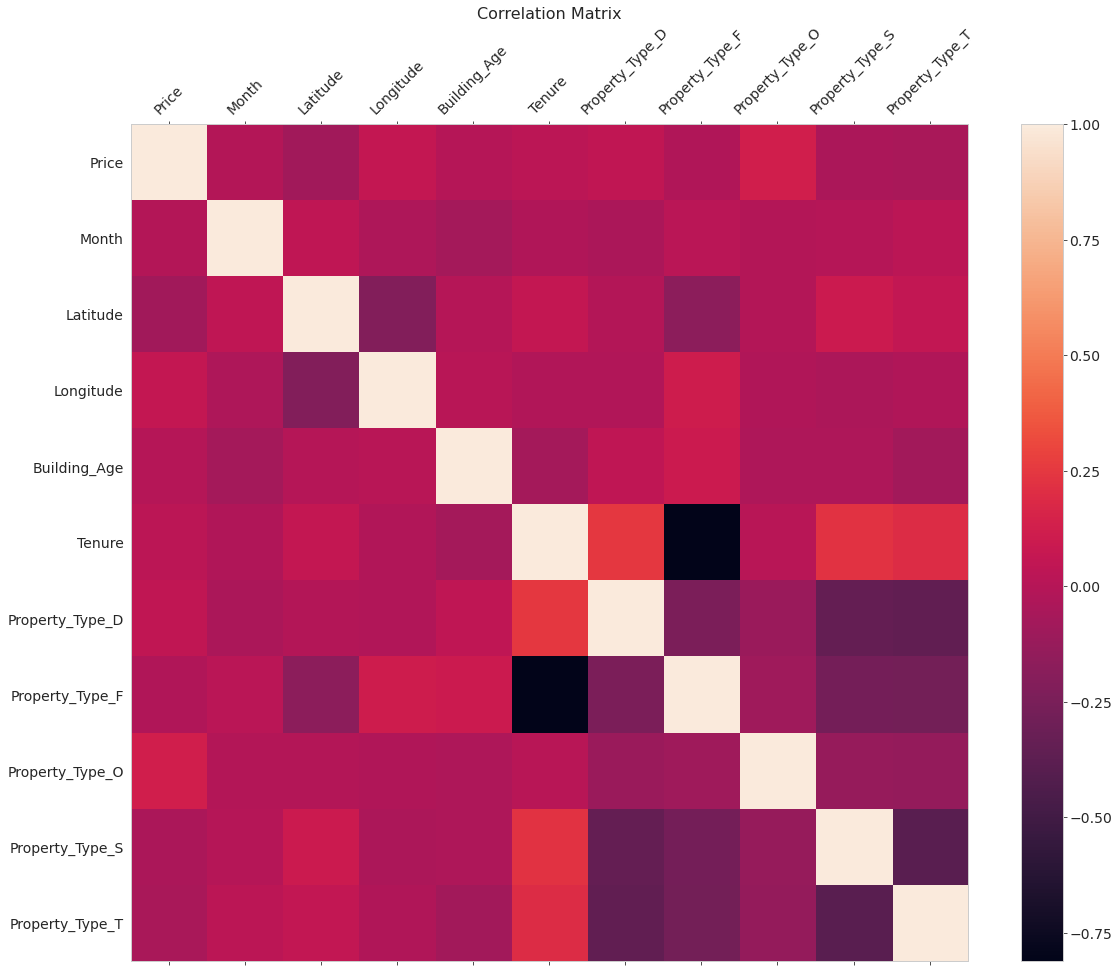

In [27]:
df = df_cleaned
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### 5.3 Linear Regression with VIF

The Variance Inflation Factor (VIF) is a measure of multicolinearity among predictors within a multiple regression task. It is the quotient of the variance in a model with multiple predictors by the variance of a model with a single predictor. More explanation of the theory can be found here.

Steps for using VIF to deal with multicolineartiy are:

Initialise L as the list of independent variables. (HINT: the response variable is not needed here)
Calculate the VIF for each variable in L. (HINT: the order of computing VIF is irrelevant).
If the highest VIF is larger than the threshold, remove the variable from the list L.
Repeat Step 2-3, until no VIF is larger than the threshold.
Return L.
Below is an example of using VIF on the bike_rental dataset. Note that the statsmodels package is used.

In [28]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [29]:
# using VIF on the cleaned price paid dataset

train_x_VIF = drop_column_using_vif_(X_train, thresh=5)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Max VIF: inf
Dropping: Property_Type_D
Max VIF: 3.756829829272835
The columns remaining after VIF selection are:
Index(['Month', 'Latitude', 'Longitude', 'Building_Age', 'Tenure',
       'Property_Type_F', 'Property_Type_O', 'Property_Type_S',
       'Property_Type_T'],
      dtype='object')


#### Build a linear regression model

Now we can fit a linear regression model after dealing with the multicolinearity, and we will do it using the sklearn package.

Just like clustering analysis in sklearn, we will run the regression model using the .fit() function. Make sure you get the variables the right way around.

In [30]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

NameError: name 'train_y' is not defined

In [ ]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

## 6. Results and Discussion

## 7. Conclusion

In [ ]:
end_time = time.time()
run_time = end_time - start_time
print("Total run time: ", run_time, "seconds")

*(word count: )*

## Bibliography